In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
sns.set_theme()


In [6]:
df = pd.read_csv("../cleaned.csv")
df

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,0,banki.ru,кредитные карты,Кредитные карты,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN
1,2025-03-24 20:06:00,2025-03-28 17:42:39.772,6601bfab426e4f56cc1e44d859683763,Страховая,1,0,banki.ru,страховая,Страхование,Не определено,страховое событие,жалоба по страховому случаю,"Обратился по каско , влетел камень в лобовое с...",проблема решена,M,NaN,NaN,NaN,РФ,NaN,NaN,NaN,NaN,NaN,NaN
2,2025-07-08 07:40:43,2025-07-08 10:29:04.740,f1f8eff66eaf2289f61deec744871d6b,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,мп/лк/терминал,установка/обновление приложения,Я уже очень давно пользуюсь услугами Тбанка и ...,не указано,M,GRD,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN
3,2025-08-07 22:51:48,2025-08-08 09:35:34.593,5ca669878eaf593f68c10e163246357b,SME,5,1,banki.ru,sme,Бизнес-продукты,Не определено,дополнительные услуги,консультация по услуге,"Уважаемое руководство Т- Банка,\n\n\nНастоящим...",не указано,F,GRD,MAR,0.0,РФ,Высокодоходные без ПМ,0.0,0.0,1.0,Взрослые,NaN
4,2025-02-13 21:38:40,2025-02-14 08:04:44.643,7a436100b113ce78c8a7a02974521a16,Банк,5,1,banki.ru,депозитные продукты,Дебетовые карты,Не определено,кэшбек,корректировка кэшбека,Выбрал на текущий месяц повышенный кэшбек на к...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Сеньоры,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56815,NaN,2025-05-23 19:25:21.222,19a90f722e0088dbd5c1140326475d4c,Страховая,5,1,banki.ru,страховая,Страхование,Не определено,страховое событие,консультации по существующему страховому событию,Отдыхали в новый год в Тель-Авиве с ребёнком. ...,не указано,M,NaN,DIV,0.0,РФ,NaN,NaN,NaN,NaN,NaN,NaN
56816,NaN,2025-09-26 13:27:02.360,3e5ccb5ffa7055f82085ccd18b7190c4,Банк,5,1,sravni.ru,поддержка сотрудников,Не определено,Не определено,тарифы и условия,консультация по продукту,Здравствуйте я очень довольна работой группы п...,не указано,F,GRD,CIV,0.0,РФ,Доходные,0.0,0.0,0.0,Сеньоры,NaN
56817,NaN,2025-10-23 19:20:28.205,ff8dee14ae0b2c22593ab20ffb9d8e26,Банк,5,1,sravni.ru,депозитные продукты,Дебетовые карты,Не определено,мп/лк/терминал,консультация по интерфейсу,Банк и прилодение\nПо моему мнению лучший банк...,не указано,M,NaN,MAR,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,NaN
56818,NaN,2025-09-02 13:35:01.523,b8deb649421f64fc4a5b6c71b350f528,Банк,5,1,banki.ru,премиальные сервисы,Премиальные продукты,Не определено,"платежи, переводы и операции",отмена / оспаривание,Огромная благодарность сотруднику Т-Банка (Лео...,не указано,M,NaN,NaN,0.0,РФ,Доходные,0.0,0.0,1.0,Взрослые,NaN


In [7]:
df["review_dttm"] = pd.to_datetime(df["review_dttm"], errors='coerce')
df["finish_dttm"] = pd.to_datetime(df["finish_dttm"], errors='coerce')

In [8]:
df["is_credit_product"] = df["product"].apply(lambda x: x in ["Кредитные карты", "Потребительские кредиты наличными", "Автокредиты", "Рассрочка и кредиты в покупках", "Ипотека и ипотечное рефинансирование", "Залоговые кредиты", "Проблемная задолженность"])
df[df["is_credit_product"]]["product"].unique()

array(['Кредитные карты', 'Залоговые кредиты',
       'Потребительские кредиты наличными', 'Автокредиты',
       'Рассрочка и кредиты в покупках',
       'Ипотека и ипотечное рефинансирование', 'Проблемная задолженность'],
      dtype=object)

In [9]:
creds = df[df["is_credit_product"]]
creds["product"].unique()

array(['Кредитные карты', 'Залоговые кредиты',
       'Потребительские кредиты наличными', 'Автокредиты',
       'Рассрочка и кредиты в покупках',
       'Ипотека и ипотечное рефинансирование', 'Проблемная задолженность'],
      dtype=object)

In [10]:
product_stats = (
    df.groupby(['product', 'is_credit_product'])['review_emotion']
      .agg(share_positive='mean', count='size')
      .reset_index()
)

product_stats_mark = (
    df.groupby(["product", "is_credit_product"])["review_mark"]
      .agg(mean_mark='mean', median_mark='median', mark_std='std')
      .reset_index()
)

product_stats = product_stats.merge(product_stats_mark, on=["product", "is_credit_product"])

product_stats

,product,is_credit_product,share_positive,count,mean_mark,median_mark,mark_std
0,Lifestyle-сервисы,False,0.285714,490,2.263265,1.0,1.762504
1,Автокредиты,True,0.268150,854,2.125293,1.0,1.759780
2,Банкоматы,False,0.425806,155,2.787097,1.0,1.927205
3,Бизнес-продукты,False,0.893651,4946,4.584513,5.0,1.204237
4,Вклады и накопительные продукты,False,0.316916,467,2.385439,1.0,1.804038
5,Дебетовые карты,False,0.452434,18732,2.905776,2.0,1.930133
6,Залоговые кредиты,True,0.055556,234,1.341880,1.0,0.968716
7,Инвестиции и брокерские счета,False,0.792401,4369,4.257496,5.0,1.460979
8,Ипотека и ипотечное рефинансирование,True,0.046632,193,1.279793,1.0,0.903959
9,Кредитные карты,True,0.269494,3065,2.190212,1.0,1.738831


In [11]:
product_stats[["share_positive", "mean_mark"]].corr()

,share_positive,mean_mark
share_positive,1.000000,0.997431
mean_mark,0.997431,1.000000


In [12]:
cred_stats = product_stats[product_stats["is_credit_product"]]
cred_stats

,product,is_credit_product,share_positive,count,mean_mark,median_mark,mark_std
1,Автокредиты,True,0.268150,854,2.125293,1.0,1.759780
6,Залоговые кредиты,True,0.055556,234,1.341880,1.0,0.968716
8,Ипотека и ипотечное рефинансирование,True,0.046632,193,1.279793,1.0,0.903959
9,Кредитные карты,True,0.269494,3065,2.190212,1.0,1.738831
13,Потребительские кредиты наличными,True,0.412490,1217,2.738702,1.0,1.921765
15,Проблемная задолженность,True,0.000000,155,1.096774,1.0,0.374065
16,Рассрочка и кредиты в покупках,True,0.505219,479,3.079332,4.0,1.958238


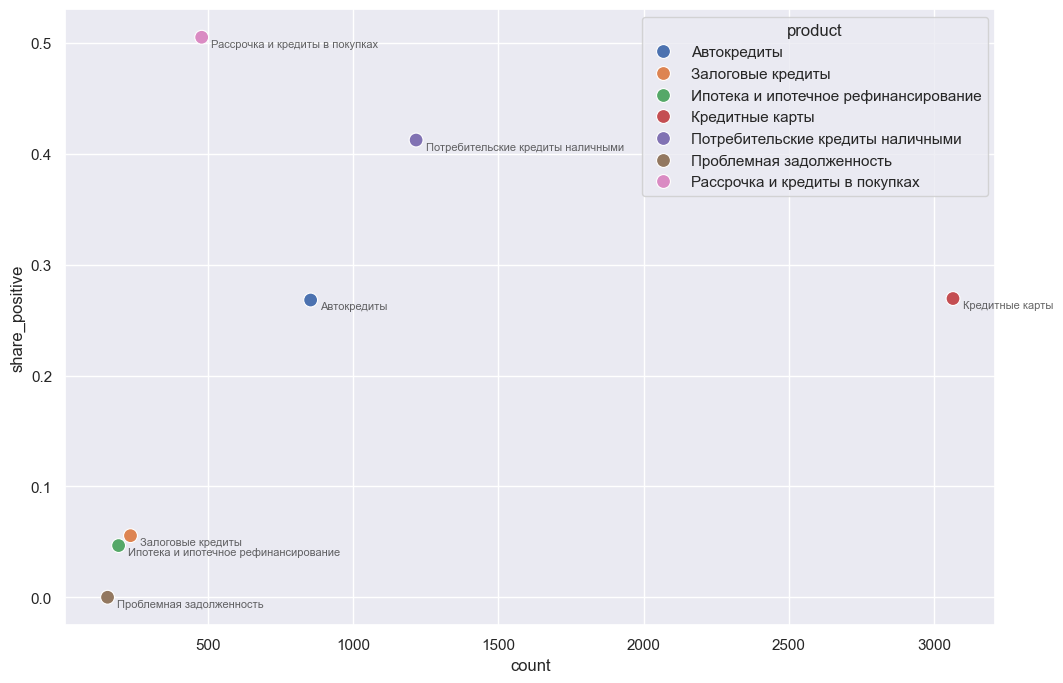

In [13]:
plt.figure(figsize=(12, 8))
sns.scatterplot(data=cred_stats, x="count", y="share_positive", hue="product", s=100)

for idx, row in cred_stats.iterrows():
    plt.annotate(row['product'], 
                 (row['count'], row['share_positive']),
                 xytext=(7, -7),
                 textcoords='offset points',
                 fontsize=8,
                 alpha=0.7)

In [14]:
reasons = df.dropna(subset=["reason"])
reasons_by_products = reasons.groupby(["product", "is_credit_product"])["reason"].value_counts().to_frame().reset_index().rename(columns={"reason": "count"})
reasons_by_products[reasons_by_products["is_credit_product"]]

,product,is_credit_product,count,count
26,Автокредиты,True,Не определено,663
27,Автокредиты,True,финансовая информация,57
28,Автокредиты,True,общая информация,30
29,Автокредиты,True,долго решали вопрос,17
30,Автокредиты,True,досрочное погашение,16
...,...,...,...,...
612,Рассрочка и кредиты в покупках,True,о сервисе оплаты долями,1
613,Рассрочка и кредиты в покупках,True,отправка e-mail,1
614,Рассрочка и кредиты в покупках,True,равнодушие,1
615,Рассрочка и кредиты в покупках,True,рассрочки по кредитной и дебетовой карте,1


In [15]:
cards = df[df["product"] == "Кредитные карты"]
cards

,review_dttm,finish_dttm,id_client,company,review_mark,review_emotion,review_source,business_line,product,reason,review_theme,subtheme,review_text,solution_flg,gender_cd,education_level_cd,marital_status_cd,children_cnt,citizenship_country,segment_name,subscription_important_flg,new_flg,influencer_flg,age_segment,csat_score,is_credit_product
0,2025-02-18 15:41:00,2025-02-18 16:56:49.353,fb30834209a9c7f60612c64b82c75ffa,Банк,1,0,banki.ru,кредитные карты,Кредитные карты,Не определено,тарифы и условия,консультация по продукту,"Непрозрачные условия, скрытые комсисии. Почему...",проблема решена,M,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN,True
15,2025-02-18 09:19:00,2025-02-21 12:55:01.232,3c9958c7c304eec77638d74cb48429e0,Банк,1,0,banki.ru,кредитные карты,Кредитные карты,Не определено,погашение кредитных продуктов,отсрочки,Год назад Т-банк навязал моей 18 летней дочери...,проблема решена,F,GRD,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Молодежь,NaN,True
21,2025-03-14 11:12:33,2025-03-14 11:39:05.029,25dd032b7e80c0b21e78d9f342ee3ebb,Банк,5,1,banki.ru,кредитные карты,Кредитные карты,Не определено,тарифы и условия,возвраты,Вчера обнаружила начисленный процент по кредит...,не указано,F,NaN,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Взрослые,NaN,True
27,2025-09-25 21:36:58,2025-09-25 22:27:16.390,1b75610f49b377de6d3a7bd2885872b4,Банк,1,0,banki.ru,кредитные карты,Кредитные карты,Не определено,доставки,детали встречи,Хочу поделиться шокирующим опытом взаимодейств...,не указано,F,NaN,UNM,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN,True
34,2025-08-05 17:46:18,2025-08-05 19:27:35.525,ebd9ac575aeae20ffb721fceffabcefd,Банк,1,0,banki.ru,кредитные карты,Кредитные карты,Не определено,тарифы и условия,консультация по продукту,В общем в прошлом году воспользовался кредитно...,не указано,M,UGR,UNM,0.0,РФ,Малодоходные,0.0,0.0,0.0,Не определен,1.0,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56739,NaT,2025-04-09 12:25:21.907,f210ec3ca4e0c2e2f690f964aba42e1d,Банк,3,0,banki.ru,кредитные карты,Кредитные карты,Не определено,погашение кредитных продуктов,отсрочки,"Здравствуйте, вот такая ситуация получилась чт...",проблема решена,M,UGR,UNM,0.0,РФ,Доходные,0.0,0.0,0.0,Подростки,NaN,True
56755,NaT,2025-05-13 19:52:43.985,ab809b8a7d3499cec58302260d3e7c2f,Банк,2,0,banki.ru,кредитные карты,Кредитные карты,Не определено,тарифы и условия,консультация по продукту,Являюсь клиентом данного банка (ранее Тинькофф...,не указано,M,SCH,UNM,0.0,РФ,Малодоходные,0.0,0.0,0.0,Взрослые,NaN,True
56765,NaT,2025-10-02 08:09:41.626,57c5ca516cd2b9c9158c71ea3a2f81ad,Банк,1,0,banki.ru,кредитные карты,Кредитные карты,Не определено,коммуникации клиентам,"клиент не хочет получать звонки, уведомления, ...","Брал кредитную карту в данной организации,бесп...",не указано,M,UGR,UNM,0.0,РФ,Малодоходные,0.0,0.0,0.0,Молодежь,NaN,True
56772,NaT,2025-06-21 12:10:55.878,3df24c94edea90b5e3f0942f7a8a1566,Банк,1,0,banki.ru,кредитные карты,Кредитные карты,Не определено,погашение кредитных продуктов,списание долга,NaN,проблема решена,M,SCH,MAR,0.0,РФ,Малодоходные,0.0,0.0,0.0,Молодежь,NaN,True


/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_58968/1229481432.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cards["review_week"] = cards["review_dttm"].dt.to_period("W").dt.to_timestamp()


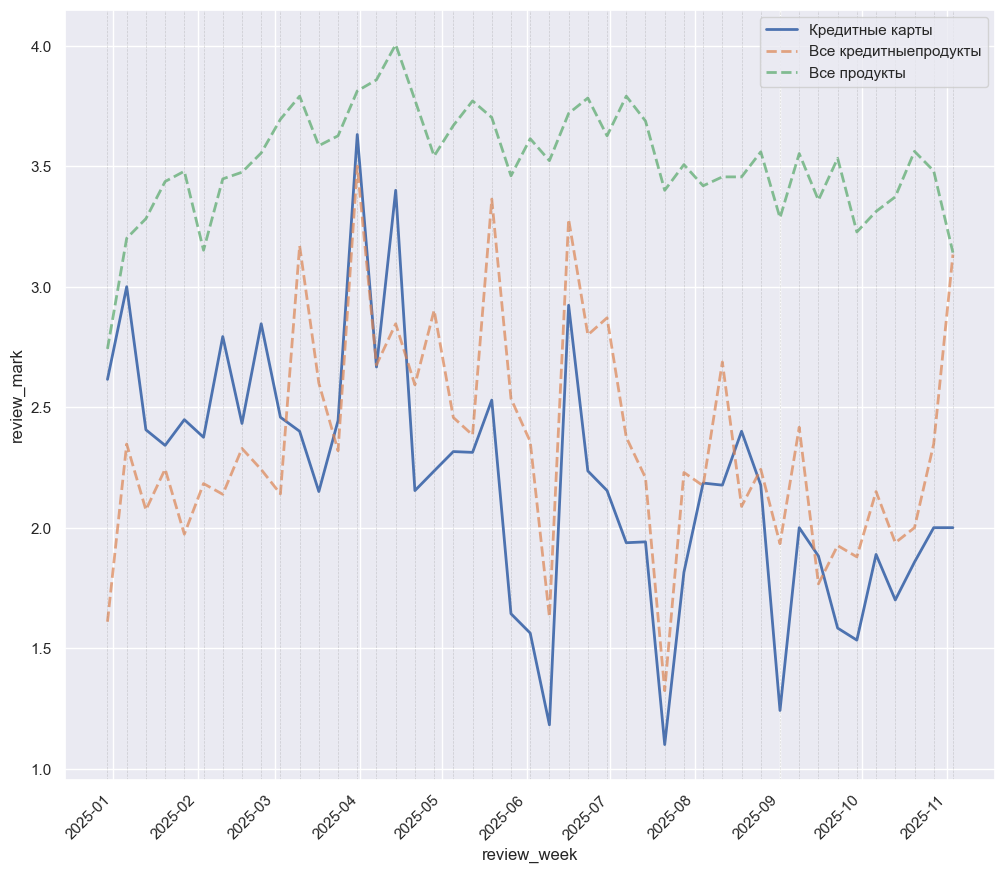

In [16]:
plt.figure(figsize=(12, 10))

cards["review_week"] = cards["review_dttm"].dt.to_period("W").dt.to_timestamp()
c = cards.groupby("review_week")["review_mark"].mean().reset_index()

df["review_week"] = df["review_dttm"].dt.to_period("W").dt.to_timestamp()
creds = df[df["is_credit_product"]]
all_credit_products = creds.groupby("review_week")["review_mark"].mean().reset_index()

all_products = df.groupby("review_week")["review_mark"].mean().reset_index()

sns.lineplot(data=c, x="review_week", y="review_mark", label="Кредитные карты", linewidth=2)
sns.lineplot(data=all_credit_products, x="review_week", y="review_mark", label="Все кредитныепродукты", linewidth=2, linestyle='--', alpha=0.7)
sns.lineplot(data=all_products, x="review_week", y="review_mark", label="Все продукты", linewidth=2, linestyle='--', alpha=0.7)


for week in c["review_week"]:
    plt.axvline(x=week, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
    
plt.xticks(rotation=45, ha='right')
plt.legend()

/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_58968/491843892.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Product Type', y='review_mark', palette="muted")


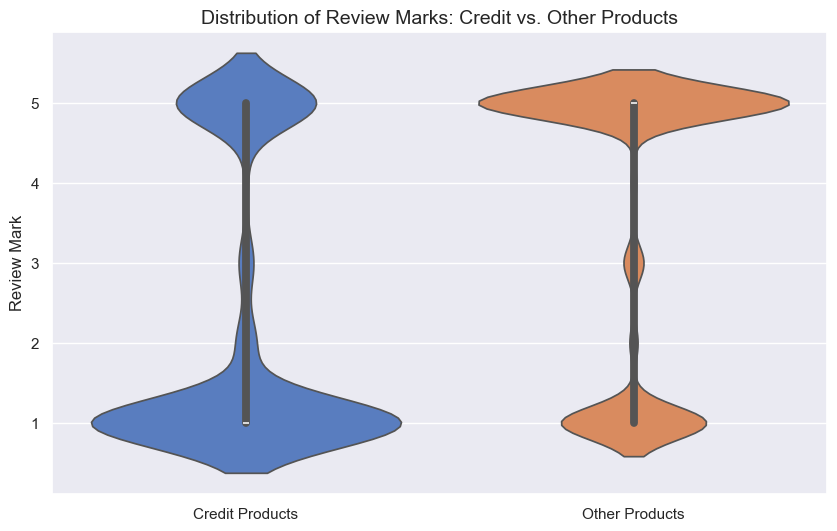

In [17]:
plt.figure(figsize=(10, 6))

df['Product Type'] = df['is_credit_product'].map({True: 'Credit Products', False: 'Other Products'})

sns.violinplot(data=df, x='Product Type', y='review_mark', palette="muted")
plt.title("Distribution of Review Marks: Credit vs. Other Products", fontsize=14)
plt.xlabel("")
plt.ylabel("Review Mark")
plt.show()

In [18]:
# top_reasons = cards['reason'].value_counts().head(7).index.tolist()
# cards_filtered = cards[cards['reason'].isin(top_reasons)]

# reason_trends = pd.crosstab(cards_filtered['review_week'], cards_filtered['reason'])

# # Plotting
# # Using a stacked area chart to show cumulative volume and individual contribution
# ax = reason_trends.plot(kind='area', stacked=True, alpha=0.6, figsize=(16, 8), colormap='tab10')

# plt.title("Dynamics of Top Reasons for Feedback (Credit Cards)", fontsize=14)
# plt.xlabel("Date")
# plt.ylabel("Number of Reviews")
# plt.legend(title="Reason", bbox_to_anchor=(1.01, 1), loc='upper left')
# plt.grid(True, alpha=0.3)
# plt.tight_layout()
# plt.show()

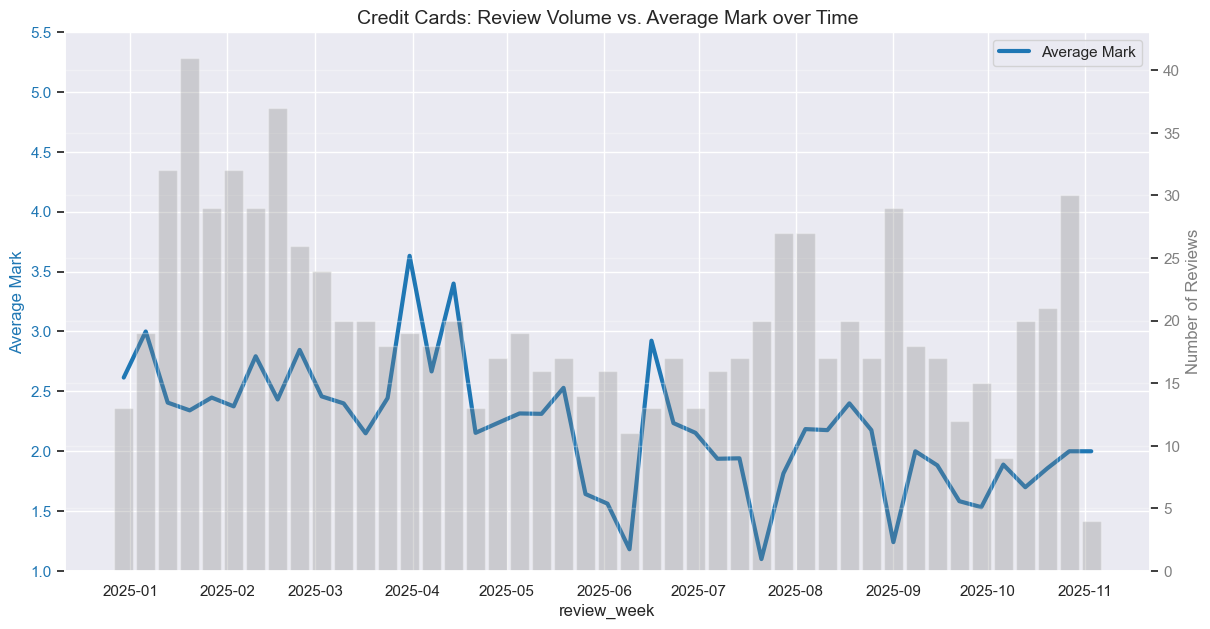

In [19]:
fig, ax1 = plt.subplots(figsize=(14, 7))

sns.lineplot(data=c, x="review_week", y="review_mark", label="Average Mark", color="tab:blue", ax=ax1, linewidth=3)
ax1.set_ylabel("Average Mark", color="tab:blue", fontsize=12)
ax1.tick_params(axis='y', labelcolor="tab:blue")
ax1.set_ylim(1, 5.5)

ax2 = ax1.twinx()
weekly_counts = cards.groupby("review_week").size().reset_index(name="count")

ax2.bar(weekly_counts["review_week"], weekly_counts["count"], color="gray", alpha=0.3, width=6, label="Review Volume")
ax2.set_ylabel("Number of Reviews", color="gray", fontsize=12)
ax2.tick_params(axis='y', labelcolor="gray")

plt.title("Credit Cards: Review Volume vs. Average Mark over Time", fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

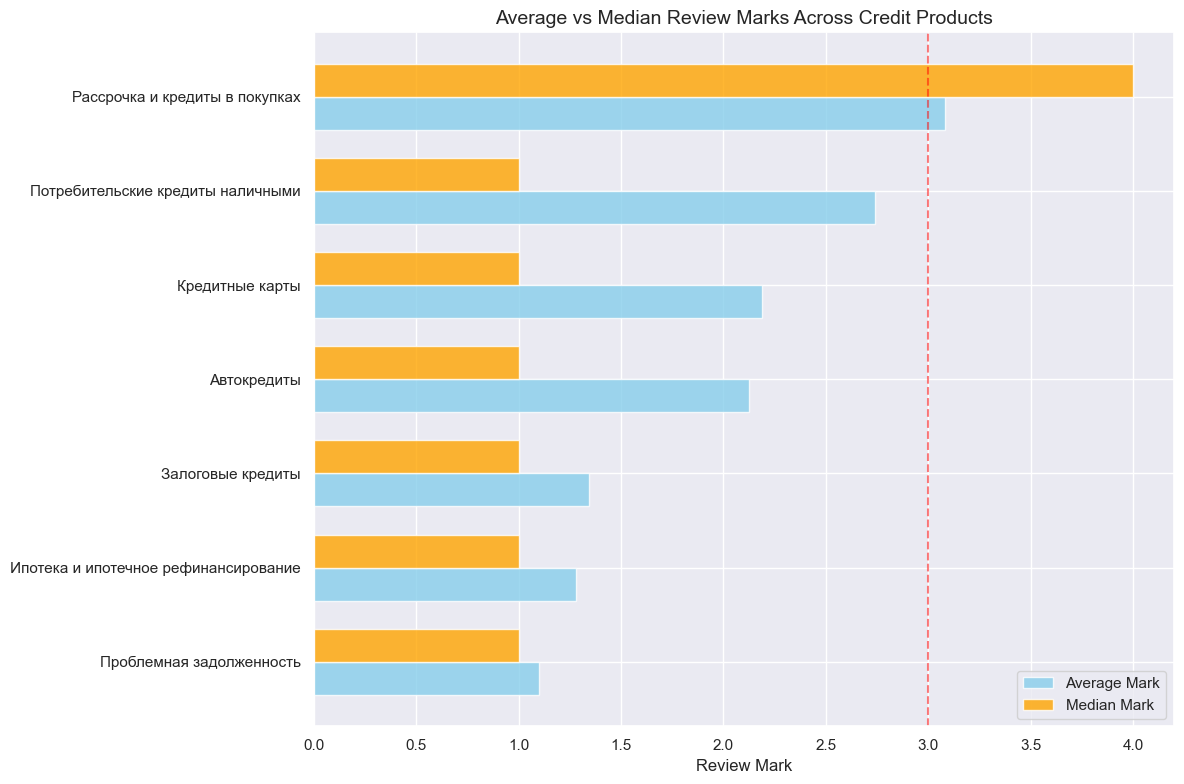

In [20]:
credit_product_marks = (
    creds.groupby('product')
    .agg(
        avg_mark=('review_mark', 'mean'),
        median_mark=('review_mark', 'median'),
        count=('review_mark', 'size')
    )
    .reset_index()
    .sort_values('avg_mark')
)

fig, ax = plt.subplots(figsize=(12, 8))

x_pos = range(len(credit_product_marks))
width = 0.35

bars1 = ax.barh([i - width/2 for i in x_pos], credit_product_marks['avg_mark'], 
                width, label='Average Mark', color='skyblue', alpha=0.8)
bars2 = ax.barh([i + width/2 for i in x_pos], credit_product_marks['median_mark'], 
                width, label='Median Mark', color='orange', alpha=0.8)

ax.set_yticks(x_pos)
ax.set_yticklabels(credit_product_marks['product'])
ax.set_xlabel('Review Mark', fontsize=12)
ax.set_title('Average vs Median Review Marks Across Credit Products', fontsize=14)
ax.legend()
ax.axvline(x=3, color='red', linestyle='--', alpha=0.5, label='Neutral (3)')
plt.tight_layout()
plt.show()

/var/folders/28/5cy4n6bn35n79ymr5smj3v7h0000gn/T/ipykernel_58968/853317814.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=reason_marks, y='reason', x='avg_mark', palette='RdYlGn_r', orient='h')


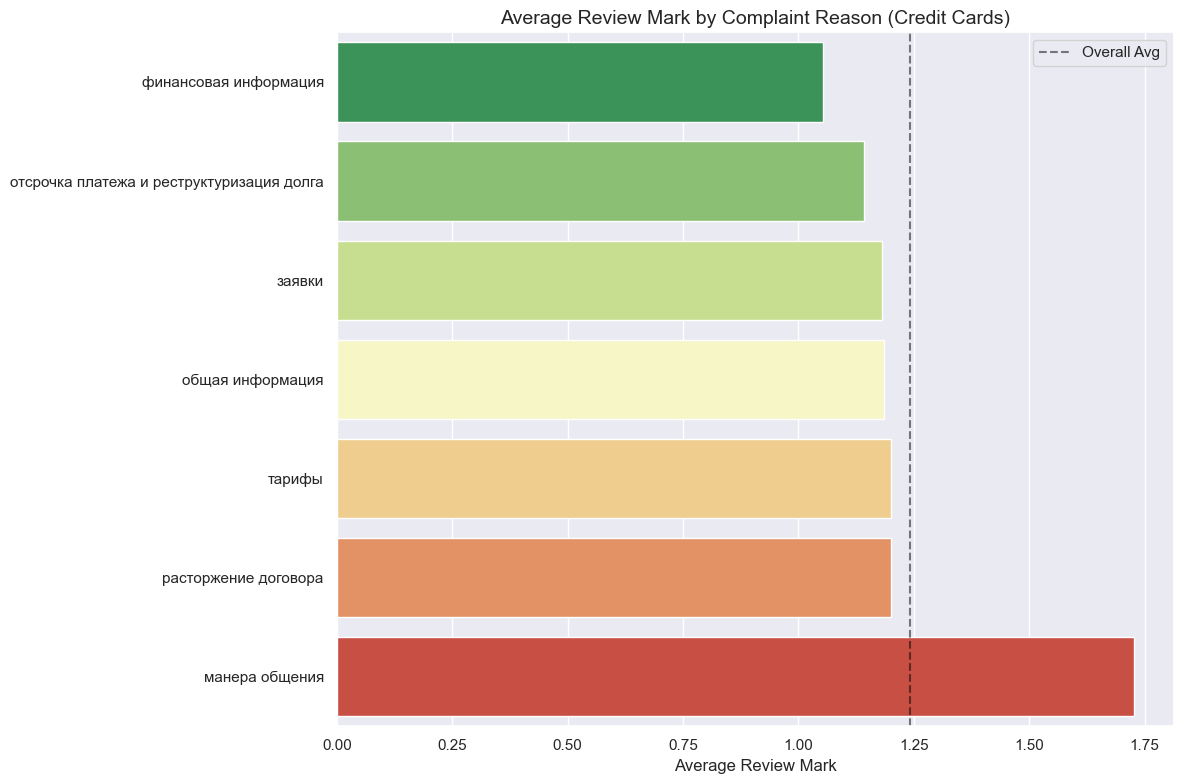

In [21]:
cards_with_reasons = cards[cards['reason'] != 'Не определено'].dropna(subset=['reason'])

reason_marks = (
    cards_with_reasons.groupby('reason')
    .agg(avg_mark=('review_mark', 'mean'), count=('review_mark', 'size'))
    .reset_index()
    .sort_values('avg_mark')
)

reason_marks = reason_marks[reason_marks['count'] >= 10]

plt.figure(figsize=(12, 8))
sns.barplot(data=reason_marks, y='reason', x='avg_mark', palette='RdYlGn_r', orient='h')
plt.axvline(x=reason_marks['avg_mark'].mean(), color='black', linestyle='--', alpha=0.5, label='Overall Avg')
plt.xlabel("Average Review Mark", fontsize=12)
plt.ylabel("")
plt.title("Average Review Mark by Complaint Reason (Credit Cards)", fontsize=14)
plt.legend()
plt.tight_layout()
plt.show()

In [22]:
default_figsize = (12, 10)

def preprocess_data(df_raw):
    df = df_raw.copy()
    
    df["review_dttm"] = pd.to_datetime(df["review_dttm"], errors='coerce')
    df["finish_dttm"] = pd.to_datetime(df["finish_dttm"], errors='coerce')
    
    df["review_week"] = df["review_dttm"].dt.to_period("W").dt.to_timestamp()
    
    credit_products = [
        "Кредитные карты", 
        "Потребительские кредиты наличными", 
        "Автокредиты", 
        "Рассрочка и кредиты в покупках", 
        "Ипотека и ипотечное рефинансирование", 
        "Залоговые кредиты", 
        "Проблемная задолженность"
    ]
    df["is_credit_product"] = df["product"].apply(lambda x: x in credit_products)
    
    return df

def plot_context(df, product_df, product_name):
    plt.figure(figsize=default_figsize)

    c = product_df.groupby("review_week")["review_mark"].mean().reset_index()

    creds = df[df["is_credit_product"]]
    all_credit_products = creds.groupby("review_week")["review_mark"].mean().reset_index()
    all_products = df.groupby("review_week")["review_mark"].mean().reset_index()

    sns.lineplot(data=c, x="review_week", y="review_mark", label=product_name, linewidth=2)
    sns.lineplot(data=all_credit_products, x="review_week", y="review_mark", label="Все кредитные продукты", linewidth=2, linestyle='--', alpha=0.7)
    sns.lineplot(data=all_products, x="review_week", y="review_mark", label="Все продукты", linewidth=2, linestyle='--', alpha=0.7)

    for week in c["review_week"]:
        plt.axvline(x=week, color='gray', linestyle='--', alpha=0.3, linewidth=0.5)
        
    plt.xticks(rotation=45, ha='right')
    plt.title(f"{product_name}: Comparison with Market Trends", fontsize=14)
    plt.legend()
    plt.show()

def plot_volume_mark(product_df, product_name):
    c = product_df.groupby("review_week")["review_mark"].mean().reset_index()
    
    fig, ax1 = plt.subplots(figsize=(14, 7))

    sns.lineplot(data=c, x="review_week", y="review_mark", label="Average Mark", color="tab:blue", ax=ax1, linewidth=3)
    ax1.set_ylabel("Average Mark", color="tab:blue", fontsize=12)
    ax1.tick_params(axis='y', labelcolor="tab:blue")
    ax1.set_ylim(1, 5.5)

    ax2 = ax1.twinx()
    weekly_counts = product_df.groupby("review_week").size().reset_index(name="count")

    ax2.bar(weekly_counts["review_week"], weekly_counts["count"], color="gray", alpha=0.3, width=6, label="Review Volume")
    ax2.set_ylabel("Number of Reviews", color="gray", fontsize=12)
    ax2.tick_params(axis='y', labelcolor="gray")

    plt.title(f"{product_name}: Review Volume vs. Average Mark over Time", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_reason_dynamics(product_df, product_name, top_n=7):
    if product_df['reason'].dropna().empty:
        print("No reason data available for dynamics plot.")
        return

    top_reasons = product_df['reason'].value_counts().head(top_n).index.tolist()
    cards_filtered = product_df[product_df['reason'].isin(top_reasons)]

    if cards_filtered.empty:
        print("Not enough data for reason dynamics.")
        return

    reason_trends = pd.crosstab(cards_filtered['review_week'], cards_filtered['reason'])

    ax = reason_trends.plot(kind='area', stacked=True, alpha=0.6, figsize=default_figsize, colormap='tab10')

    plt.title(f"Dynamics of Top Reasons for Feedback ({product_name})", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Number of Reviews")
    plt.legend(title="Reason", bbox_to_anchor=(1.01, 1), loc='upper left')
    plt.grid(True, alpha=0.3)
    plt.tight_layout()
    plt.show()

def plot_reason_marks(product_df, product_name, min_reviews=10):
    cards_with_reasons = product_df[product_df['reason'] != 'Не определено'].dropna(subset=['reason'])

    if cards_with_reasons.empty:
        print("No defined reasons available for analysis.")
        return

    reason_marks = (
        cards_with_reasons.groupby('reason')
        .agg(avg_mark=('review_mark', 'mean'), count=('review_mark', 'size'))
        .reset_index()
        .sort_values('avg_mark')
    )

    reason_marks = reason_marks[reason_marks['count'] >= min_reviews]
    
    if reason_marks.empty:
        print(f"Not enough data (>= {min_reviews} reviews per reason) for reason mark analysis.")
        return

    plt.figure(figsize=default_figsize)
    sns.barplot(data=reason_marks, y='reason', x='avg_mark', palette='RdYlGn_r', hue="reason", legend=False, orient='h')
    plt.axvline(x=reason_marks['avg_mark'].mean(), color='black', linestyle='--', alpha=0.5, label='Overall Avg')
    plt.xlabel("Average Review Mark", fontsize=12)
    plt.ylabel("")
    plt.title(f"Average Review Mark by Complaint Reason ({product_name})", fontsize=14)
    plt.legend()
    plt.tight_layout()
    plt.show()

def analyze_product_pipeline(df_raw, product_name):    
    df = preprocess_data(df_raw)
    
    product_df = df[df['product'] == product_name].copy()
    
    if len(product_df) == 0:
        print(f"No data found for product: {product_name}")
        return
        
    print(f"Found {len(product_df)} reviews for {product_name}")
    
    plot_context(df, product_df, product_name)
    plot_volume_mark(product_df, product_name)
    plot_reason_dynamics(product_df, product_name)
    plot_reason_marks(product_df, product_name)
    

In [23]:
def plot_credit_market_overview(df):
    """
    Scatterplot of Share of Positive Reviews vs Review Volume for Credit Products.
    """
    # Calculate stats for all products
    product_stats = (
        df.groupby(['product', 'is_credit_product'])['review_emotion']
          .agg(share_positive='mean', count='size')
          .reset_index()
    )
    
    # Filter for credit products
    cred_stats = product_stats[product_stats["is_credit_product"]]
    
    if cred_stats.empty:
        print("No credit products found for market overview.")
        return

    plt.figure(figsize=(12, 8))
    sns.scatterplot(data=cred_stats, x="count", y="share_positive", hue="product", s=100)

    # Annotate points
    for idx, row in cred_stats.iterrows():
        plt.annotate(row['product'], 
                     (row['count'], row['share_positive']),
                     xytext=(7, -7),
                     textcoords='offset points',
                     fontsize=8,
                     alpha=0.7)
                     
    plt.title("Credit Products: Positive Share vs. Review Volume", fontsize=14)
    plt.grid(True, alpha=0.3)
    plt.show()

def plot_category_distribution(df):
    """
    Violin plot comparing review mark distribution: Credit vs Other Products.
    """
    plt.figure(figsize=(10, 6))
    
    # Create temporary column for plotting
    plot_df = df.copy()
    plot_df['Product Type'] = plot_df['is_credit_product'].map({True: 'Credit Products', False: 'Other Products'})

    sns.violinplot(data=plot_df, x='Product Type', y='review_mark', palette="muted")
    plt.title("Distribution of Review Marks: Credit vs. Other Products", fontsize=14)
    plt.xlabel("")
    plt.ylabel("Review Mark")
    plt.show()

def plot_credit_product_ranking(df):
    """
    Bar chart comparing Average and Median marks across all credit products.
    """
    creds = df[df["is_credit_product"]]
    
    if creds.empty:
        print("No credit products data available for ranking.")
        return

    credit_product_marks = (
        creds.groupby('product')
        .agg(
            avg_mark=('review_mark', 'mean'),
            median_mark=('review_mark', 'median'),
            count=('review_mark', 'size')
        )
        .reset_index()
        .sort_values('avg_mark')
    )

    fig, ax = plt.subplots(figsize=(12, 8))

    x_pos = range(len(credit_product_marks))
    width = 0.35

    bars1 = ax.barh([i - width/2 for i in x_pos], credit_product_marks['avg_mark'], 
                    width, label='Average Mark', color='skyblue', alpha=0.8)
    bars2 = ax.barh([i + width/2 for i in x_pos], credit_product_marks['median_mark'], 
                    width, label='Median Mark', color='orange', alpha=0.8)

    ax.set_yticks(x_pos)
    ax.set_yticklabels(credit_product_marks['product'])
    ax.set_xlabel('Review Mark', fontsize=12)
    ax.set_title('Average vs Median Review Marks Across Credit Products', fontsize=14)
    ax.legend()
    ax.axvline(x=3, color='red', linestyle='--', alpha=0.5, label='Neutral (3)')
    plt.tight_layout()
    plt.show()

def analyze_general_stats_pipeline(df_raw):
    """
    Master pipeline function to generate general statistics and comparisons 
    for the entire dataset and credit products group.
    """
    print("Starting General Market Analysis...")
    
    # 1. Preprocess Data (using the function defined previously)
    # Ensure preprocess_data is defined in the notebook before running this
    if 'preprocess_data' not in globals():
        print("Error: 'preprocess_data' function is not defined. Please run the cell defining it first.")
        return
        
    df = preprocess_data(df_raw)
    
    # 2. Generate Visualizations
    plot_credit_market_overview(df)
    plot_category_distribution(df)
    plot_credit_product_ranking(df)
    
    print("General Analysis Complete.")

# Example usage:
# df_raw = pd.read_csv("../cleaned.csv")
# analyze_general_stats_pipeline(df_raw)

In [24]:
def plot_comparison_mark_trends(df, product_a, product_b):
    """
    Compares the average mark trends of two products over time on a single graph.
    """
    # Filter for the two products
    comparison_df = df[df['product'].isin([product_a, product_b])].copy()
    
    if comparison_df.empty:
        print("No data found for the specified products.")
        return

    # Group by week and product
    trend_data = comparison_df.groupby(["review_week", "product"])["review_mark"].mean().reset_index()

    plt.figure(figsize=(14, 8))
    sns.lineplot(data=trend_data, x="review_week", y="review_mark", hue="product", linewidth=2.5, palette=["tab:blue", "tab:orange"])
    
    plt.title(f"Review Mark Trends: {product_a} vs {product_b}", fontsize=14)
    plt.xlabel("Date")
    plt.ylabel("Average Review Mark")
    plt.grid(True, alpha=0.3)
    plt.legend(title="Product")
    plt.show()

def plot_comparison_volume_vs_mark(df, product_a, product_b):
    """
    Creates side-by-side (or top-bottom) plots for Review Volume vs Average Mark 
    to compare the dynamics of two products.
    """
    fig, axes = plt.subplots(2, 1, figsize=(14, 12), sharex=True)
    
    products = [product_a, product_b]
    colors = ["tab:blue", "tab:orange"]
    
    for i, product in enumerate(products):
        ax1 = axes[i]
        product_df = df[df['product'] == product]
        
        if product_df.empty:
            ax1.text(0.5, 0.5, f"No data for {product}", ha='center', va='center')
            continue

        # Calculate weekly stats
        weekly_stats = product_df.groupby("review_week").agg(
            avg_mark=('review_mark', 'mean'),
            count=('review_mark', 'size')
        ).reset_index()

        # Plot Average Mark (Line)
        sns.lineplot(data=weekly_stats, x="review_week", y="avg_mark", color=colors[i], ax=ax1, linewidth=2.5, label="Average Mark")
        ax1.set_ylabel("Average Mark", color=colors[i], fontsize=10)
        ax1.tick_params(axis='y', labelcolor=colors[i])
        ax1.set_ylim(1, 5.5)
        ax1.set_title(f"{product}: Volume vs Mark Dynamics", fontsize=12)
        ax1.grid(True, alpha=0.3)

        # Plot Volume (Bar) on secondary axis
        ax2 = ax1.twinx()
        ax2.bar(weekly_stats["review_week"], weekly_stats["count"], color="gray", alpha=0.3, width=6, label="Review Volume")
        ax2.set_ylabel("Number of Reviews", color="gray", fontsize=10)
        ax2.tick_params(axis='y', labelcolor="gray")
        
        # Combine legends (optional, but simple labels work)
    
    plt.tight_layout()
    plt.show()

def plot_comparison_reason_dynamics(df, product_a, product_b):
    """
    Compares the evolution of top reasons for two products using side-by-side stacked area charts.
    """
    fig, axes = plt.subplots(1, 2, figsize=(18, 8), sharey=False) # Sharey False because volumes might differ vastly
    
    products = [product_a, product_b]
    
    for i, product in enumerate(products):
        ax = axes[i]
        product_df = df[df['product'] == product]
        
        if product_df.empty or product_df['reason'].dropna().empty:
            ax.text(0.5, 0.5, f"No reason data for {product}", ha='center', va='center')
            continue

        # Get top 7 reasons for THIS product
        top_reasons = product_df['reason'].value_counts().head(7).index.tolist()
        filtered_df = product_df[product_df['reason'].isin(top_reasons)]
        
        if filtered_df.empty:
            ax.text(0.5, 0.5, f"Not enough data for {product}", ha='center', va='center')
            continue

        # Crosstab
        reason_trends = pd.crosstab(filtered_df['review_week'], filtered_df['reason'])
        
        # Plot
        reason_trends.plot(kind='area', stacked=True, alpha=0.6, ax=ax, colormap='tab10')
        ax.set_title(f"Reason Dynamics: {product}", fontsize=12)
        ax.set_xlabel("Date")
        ax.set_ylabel("Number of Reviews")
        ax.legend(loc='upper left', fontsize='small')
        ax.grid(True, alpha=0.3)

    plt.tight_layout()
    plt.show()

def plot_comparison_reason_marks(df, product_a, product_b):
    """
    Compares average marks for the most common reasons shared between or specific to the products.
    """
    # Filter for both products and defined reasons
    comparison_df = df[
        (df['product'].isin([product_a, product_b])) & 
        (df['reason'] != 'Не определено')
    ].dropna(subset=['reason'])
    
    if comparison_df.empty:
        print("No reason data available for comparison.")
        return

    # Identify top reasons across BOTH products combined to ensure relevant comparison
    top_reasons = comparison_df['reason'].value_counts().head(10).index.tolist()
    
    # Filter data for these top reasons
    final_df = comparison_df[comparison_df['reason'].isin(top_reasons)]
    
    # Calculate stats
    reason_stats = (
        final_df.groupby(['reason', 'product'])
        .agg(avg_mark=('review_mark', 'mean'), count=('review_mark', 'size'))
        .reset_index()
    )
    
    # Filter out low volume groups (optional, e.g., < 5 reviews)
    reason_stats = reason_stats[reason_stats['count'] >= 5]

    plt.figure(figsize=(12, 10))
    sns.barplot(data=reason_stats, y='reason', x='avg_mark', hue='product', palette=["tab:blue", "tab:orange"], orient='h')
    
    plt.axvline(x=3, color='red', linestyle='--', alpha=0.5, label='Neutral (3)')
    plt.title(f"Average Mark by Top Reasons: {product_a} vs {product_b}", fontsize=14)
    plt.xlabel("Average Review Mark")
    plt.ylabel("Reason")
    plt.legend(title="Product")
    plt.tight_layout()
    plt.show()

def compare_products_pipeline(df_raw, product_a, product_b):
    """
    Master pipeline to compare two products side-by-side.
    """
    print(f"Starting Comparison: {product_a} vs {product_b}")
    
    # 1. Preprocess (Reuse existing function)
    if 'preprocess_data' not in globals():
        print("Error: 'preprocess_data' function is not defined. Please run the cell defining it first.")
        return
        
    df = preprocess_data(df_raw)
    
    # Check if products exist
    available_products = df['product'].unique()
    if product_a not in available_products:
        print(f"Error: {product_a} not found in dataset.")
        return
    if product_b not in available_products:
        print(f"Error: {product_b} not found in dataset.")
        return

    # 2. Generate Comparison Visualizations
    plot_comparison_mark_trends(df, product_a, product_b)
    plot_comparison_volume_vs_mark(df, product_a, product_b)
    plot_comparison_reason_dynamics(df, product_a, product_b)
    plot_comparison_reason_marks(df, product_a, product_b)

Starting Comparison: Кредитные карты vs Потребительские кредиты наличными


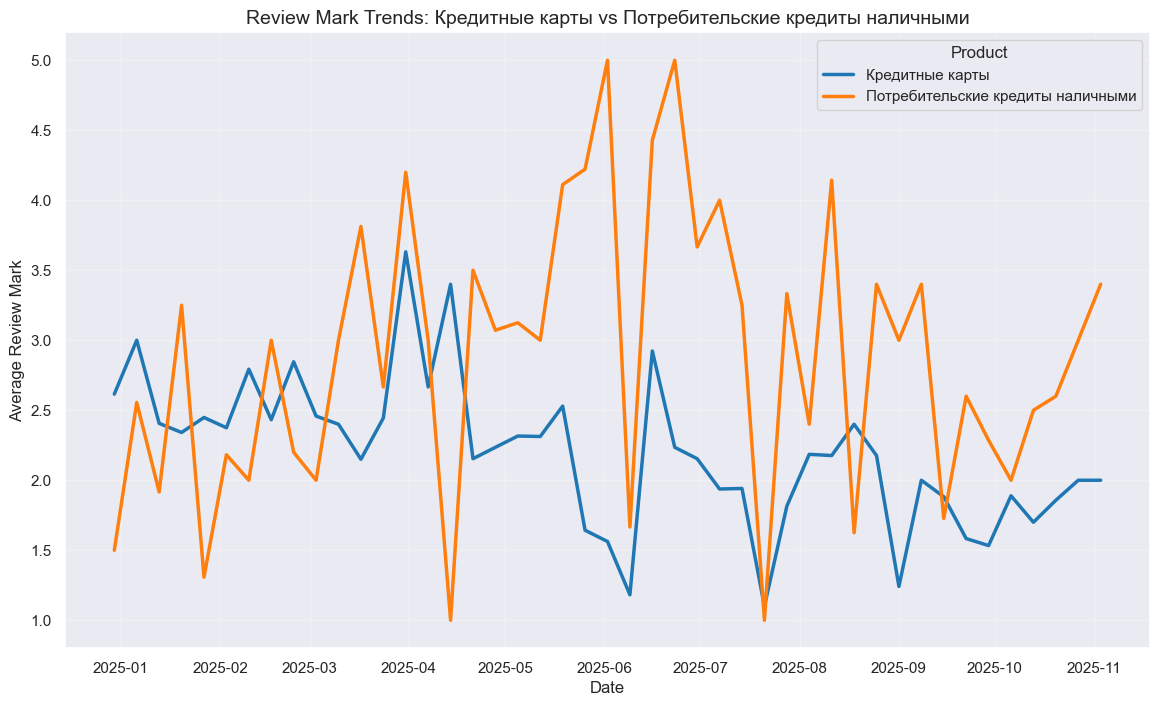

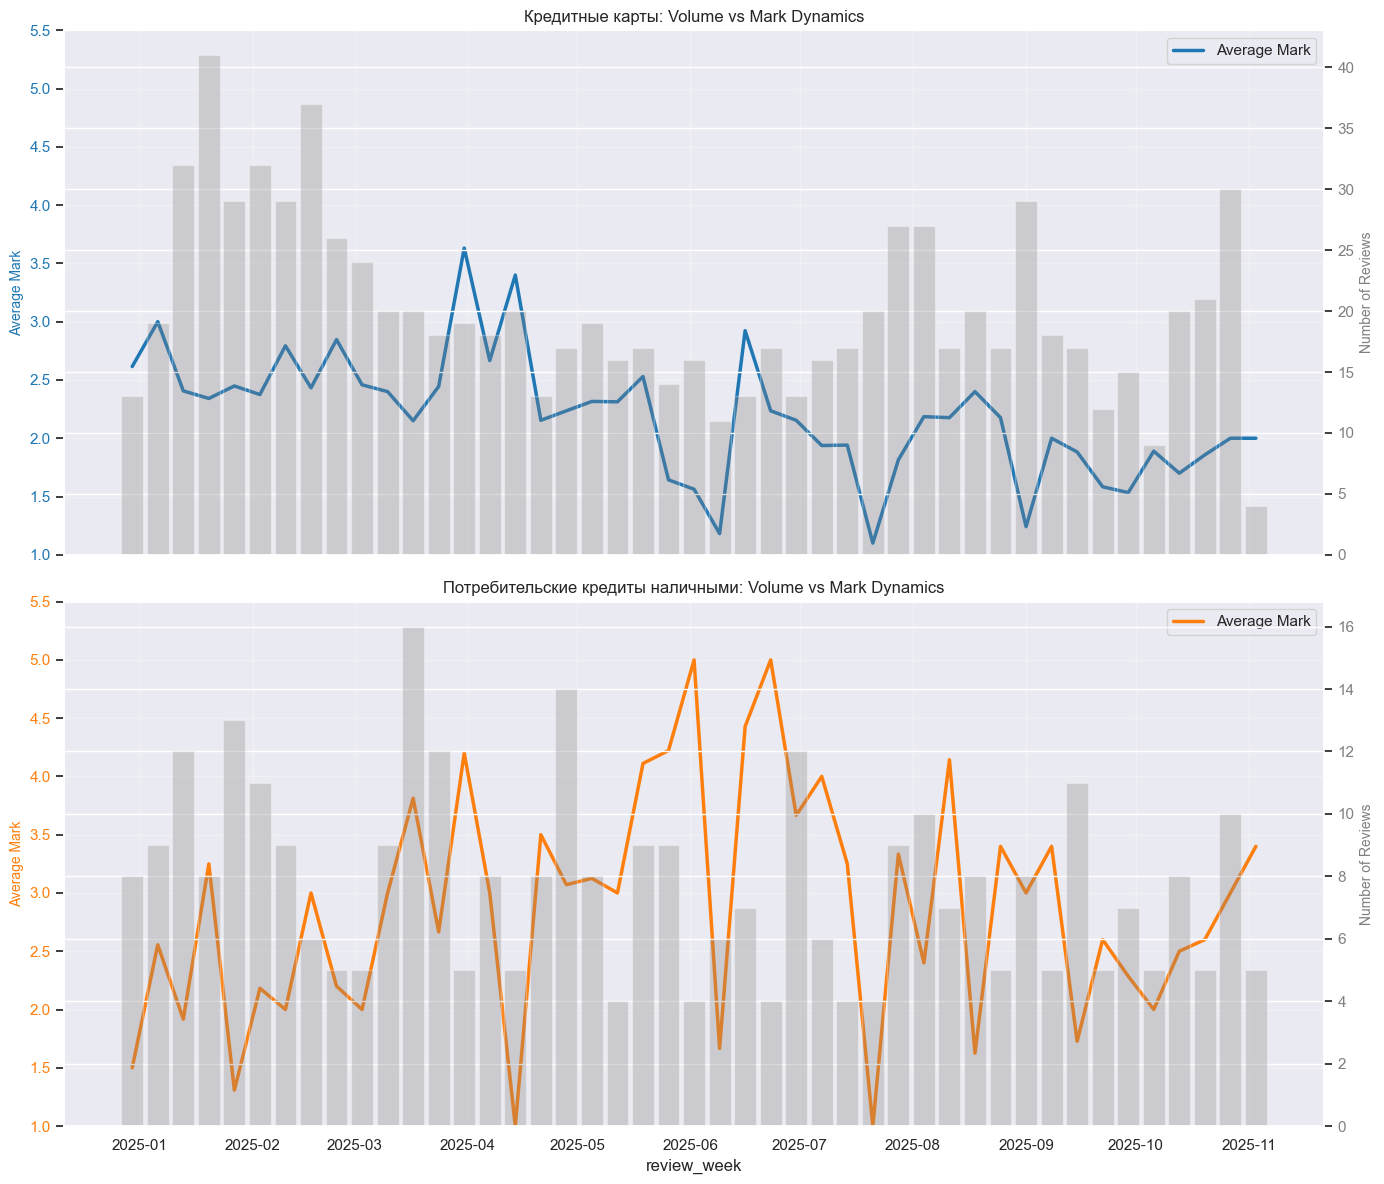

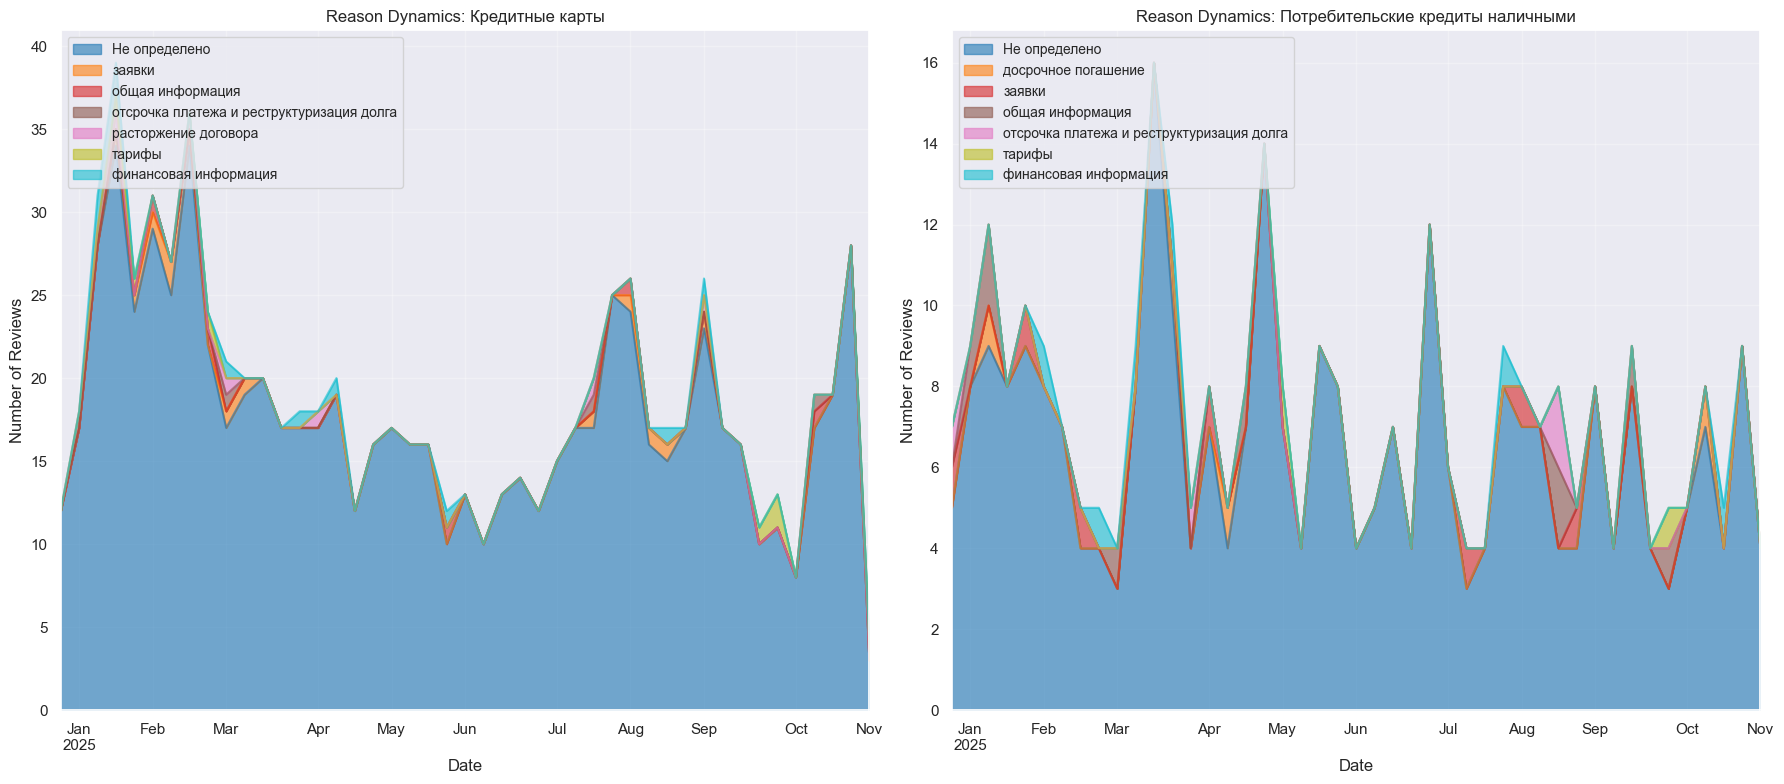

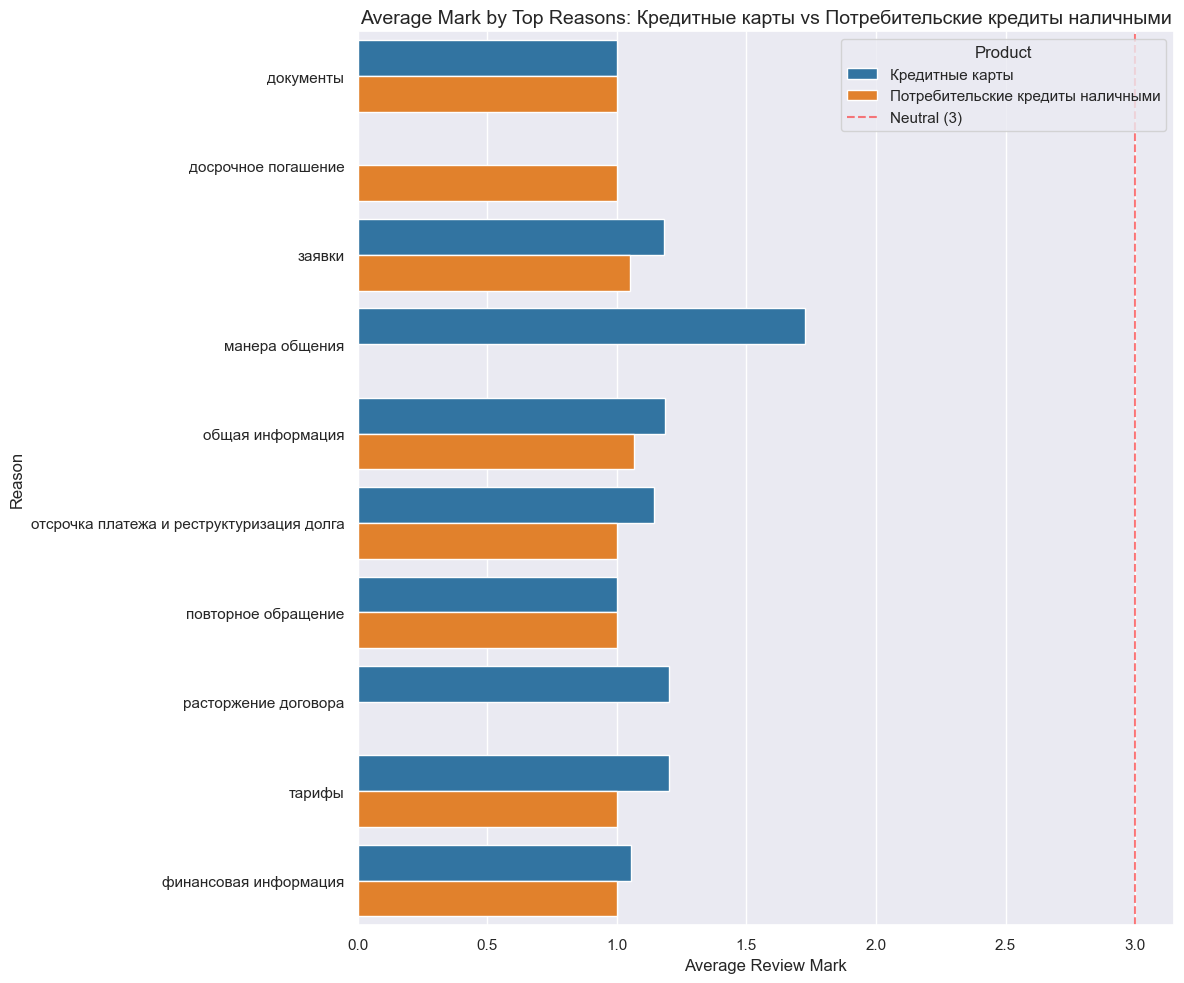

Comparison Complete.


In [25]:
compare_products_pipeline(df, "Кредитные карты", "Потребительские кредиты наличными")